# Impact du choix de la régularisation

Notre objectif ici est d’étudier l’influence du terme de régularisation $\Omega(f)$, ainsi que le coefficient $\lambda$.

Dans le cas de régularisation, la fonction devient :

$$ f(\omega, y) = \sum_{i=1}^{n} \omega_i K(x, x_i) + \lambda \Omega(f) $$

La fonction coût devient :  

$$ J (\omega, y) =  \frac{1}{n} \sum_{i = 0}^{n} \|f(\omega_i) - y_i\|^2  + \lambda\Omega(f)$$

Le gradient de la fonction coût devient : 

$$ \nabla J(\omega) = \frac{1}{n} \times K^T (K\omega - y) + \lambda\Omega(f)$$


## Cas de régularisation de Tikhonov (Régression Ridge)

Dans ce cas, on a le terme de régularisation suivant : $$\Omega(f) = \|\omega\|^2_2$$

In [10]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
K = ones(n2, n2);
K_test = ones(n2, n2);

for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 6);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega,lambda, y) 1/n * norm(f(omega) - y) + lambda * norm(omega);
gradJ = @(omega,lambda)(1/n)* K' * ((K * omega) - y_train) + lambda * eye(n2) * omega;

### Utilisation de gradient décent 

#### Si $\lambda = 1.9$ (une grande valeur de $\lambda$)

In [11]:
alpha = 1;
omega = 0.1+zeros(n2, 1);
lambda = 1.9;
num_iterations = 50000;
while (norm(gradJ(omega,lambda)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega,lambda);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega,lambda, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega,lambda)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 5.635145e-14
Nombre d'iteration : 177

##### Affichage Risque empirique  

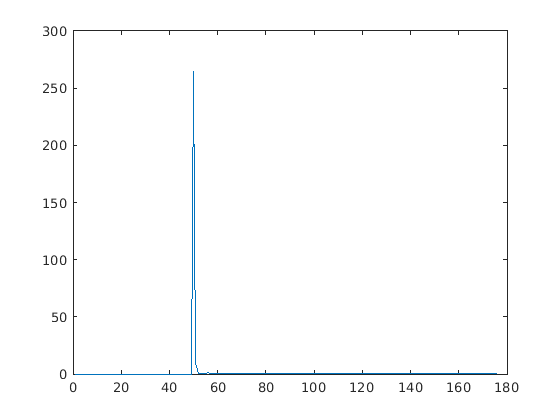

In [12]:
plot(1:i-1, err)

##### Sur les données d’entraînement : 


ans =

    0.6137



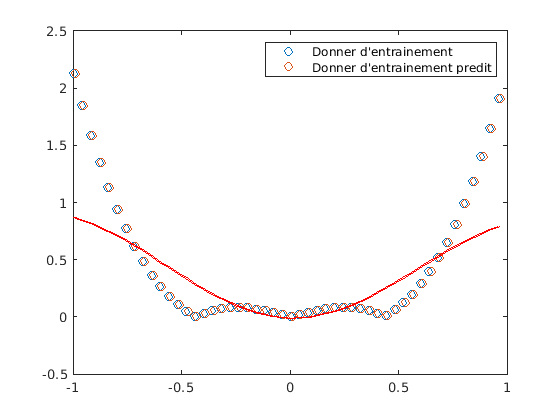

In [13]:
opt_omega = omega;
J(opt_omega,lambda ,y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off

##### Sur les données de test  :


err_rela =

    0.8303



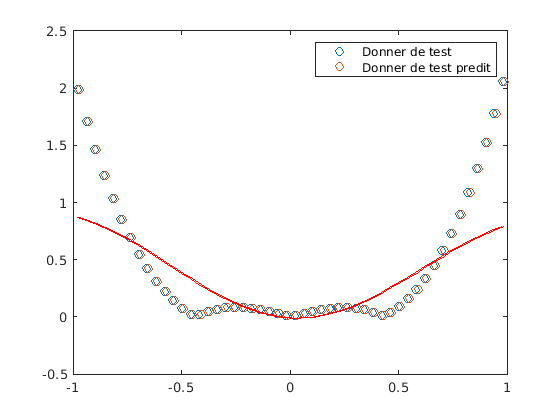

In [14]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
y_test = modele(4, X_test);
y_test_predit = K * opt_omega;
err_rela = norm(y_test  - y_test_predit) / norm(y_test_predit)
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

#### Si $\lambda = 0.001$(une petite valeur de $\lambda$)

In [15]:
alpha = 1;
omega = 0.1+zeros(n2, 1);
lambda=0.001;
num_iterations = 50000;
while (norm(gradJ(omega,lambda)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega,lambda);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega,lambda, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega,lambda)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 3.490320e-14
Nombre d'iteration : 1823

##### Affichage Risque empirique  

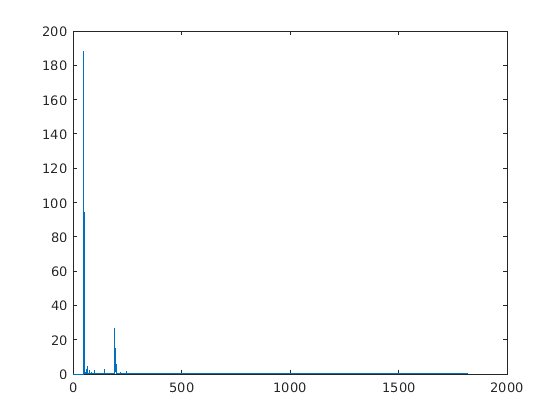

In [16]:
plot(1:i-1, err)

##### Sur les données d’entraînement : 


ans =

    0.2978



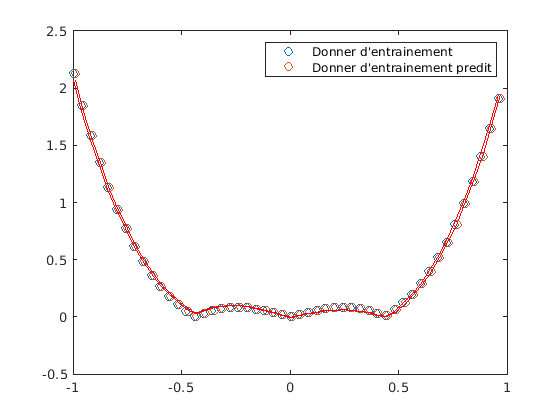

In [17]:

opt_omega = omega;
J(opt_omega,lambda ,y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


##### Sur les données de test  :


err_rela =

    0.0734



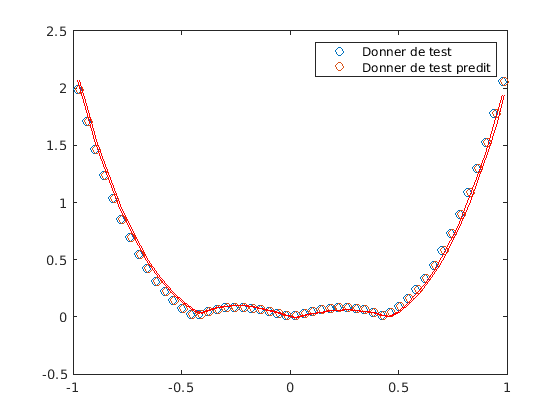

In [18]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
y_test = modele(4, X_test);
y_test_predit = K * opt_omega;
err_rela = norm(y_test  - y_test_predit) / norm(y_test_predit)
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

#### Conclusion

Pour une valeur de $\lambda$ élevée (1.9), l'algorithme a convergé rapidement (177 itérations), mais avec une erreur relative assez importante (0.8303) par rapport à celle que l'on obtient (0.0734) avec un $\lambda$ plus petit (0.001) en 1823 itérations.

## Cas de régularisation L1 (Régression LASSO)

Dans ce cas, on a le terme de régularisation suivant : $$\Omega(f) = \|\omega\|_1$$

In [20]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = 0.1+zeros(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
gama = 1.9;
lambda= 1.9;
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 6);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y) + lambda * sum(abs(omega));
gradJ = @(omega)(1/n)* K' * ((K * omega) - y_train) + lambda * sign(omega) * gama;

### Utilisation de gradient décent

#### Si $\lambda = 1,9$ (une grande valeur de $\lambda$)

In [21]:
alpha = 1;
num_iterations = 50000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 4.964620e+01
Nombre d'iteration : 50000

##### Sur les données d’entraînement : 


ans =

    8.8888



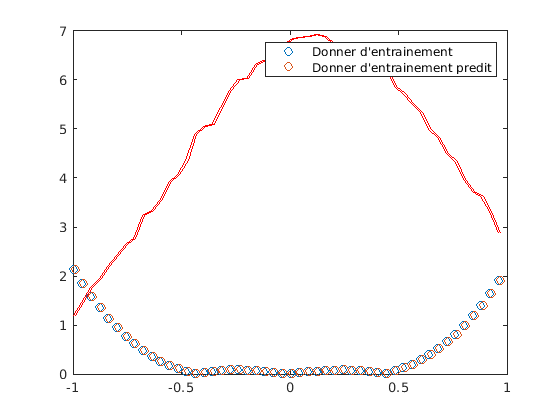

In [22]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


##### Sur les données de test  :


err_rela =

    0.9544



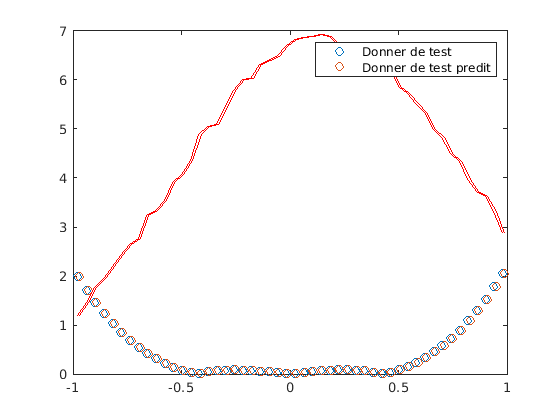

In [23]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
y_test = modele(4, X_test);
y_test_predit = K * opt_omega;
err_rela = norm(y_test  - y_test_predit) / norm(y_test_predit)
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

In [24]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = 0.1+zeros(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
gama=0.001;
lambda= 0.001;
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 6);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y)+lambda*sum(abs(omega));
gradJ = @(omega)(1/n)* K' * ((K * omega) - y_train)+lambda*sign(omega)*gama;

#### Si $\lambda = 0.001$ (une petite valeur de $\lambda$)

In [25]:
alpha = 1;
num_iterations = 50000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 9.846662e-14
Nombre d'iteration : 1875

##### Sur les données d’entraînement : 


ans =

    0.3052



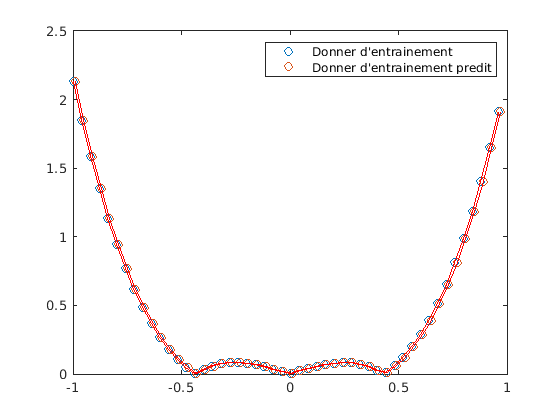

In [26]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


##### Sur les données de test  :


err_rela =

    0.0853



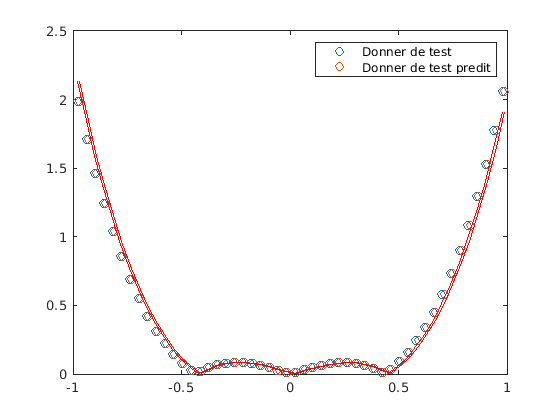

In [27]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
y_test = modele(4, X_test);
y_test_predit = K * opt_omega;
err_rela = norm(y_test  - y_test_predit) / norm(y_test_predit)
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

#### Conclusion

Pour une valeur de $\lambda$ élevée (1.9), l'algorithme a convergé lentement (50000 itérations), et avec une erreur relative assez importante (0.95) par rapport à celle que l'on obtient (0.0853) avec un $\lambda$ plus petit (0.001) en 1875 itérations.

## Cas de régularisation Elastic Net

il consiste a utiliser une combinaison de régularisation Ridge et LASSO de la
façon suivante : $$\Omega(f) = \lambda_1\|\omega\|^2_2 + \lambda_2\|\omega\|_1$$

In [28]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = 0.1+zeros(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
gama=0.001;
lambda1= 1.9;
lambda2= 1.9;
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 6);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y)+lambda1*norm(omega)+lambda2*sum(abs(omega));
gradJ = @(omega)(1/n)* K' * ((K * omega) - y_train)+lambda1*eye(n2)*omega+lambda2*sign(omega)*gama;

### Utilisation de gradient décent

#### Si $\lambda_1 = 1.9$ et $\lambda_2 = 1.9$ (une grande valeur de $\lambda$)

In [29]:
alpha = 1;
num_iterations = 50000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 1.694129e-01
Nombre d'iteration : 50000

##### Sur les données d’entraînement :


ans =

    2.4659



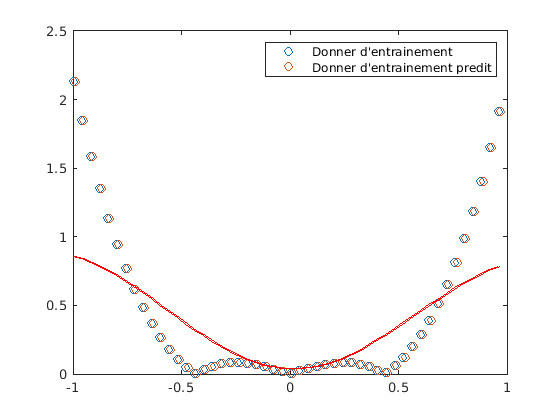

In [30]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


##### Sur les données de test :


err_rela =

    0.8256



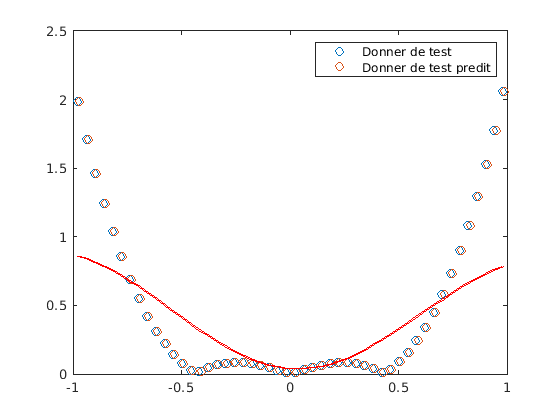

In [31]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
y_test = modele(4, X_test);
y_test_predit = K * opt_omega;
err_rela = norm(y_test  - y_test_predit) / norm(y_test_predit)
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

In [103]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
X_train = X(1:2:end,:);
X_test = X(2:2:end,:);
y_train = modele(4, X_train);
y_test = modele(4, X_test);
n2 = length(X_train);
n = length(X);
omega = 0.1+zeros(n2, 1);
K = ones(n2, n2);
K_test = ones(n2, n2);
gama=0.001;
lambda1= 0.001;
lambda2= 0.001;
for i = 1:n2 
  for j = 1:n2
    K(i,j) = noyau(X_train(i, :), X_train(j, :), 6);
  end  
end
for i = 1:n2 
  for j = 1:n2
    K_test(i,j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y)+lambda1*norm(omega)+lambda2*sum(abs(omega));
gradJ = @(omega)(1/n)* K' * ((K * omega) - y_train)+lambda1*eye(n2)*omega+lambda2*sign(omega)*gama;

#### Si $\lambda_1 = 0.001$ et $\lambda_2 = 0.001$ (une petite valeur de $\lambda$)

In [104]:
alpha = 1;
num_iterations = 50000;
while (norm(gradJ(omega)) > 10e-14 && i < num_iterations) 
  grad = gradJ(omega);
  omega =  omega - (alpha * grad);
  alpha = n2 * norm(-grad) ^ 2 / (norm(K' * -grad) ^ 2 / 2);
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
  i = i + 1;
end
fprintf("la norme de gradient : %d\n",norm(gradJ(omega)))
fprintf("Nombre d'iteration : %d", i);

la norme de gradient : 7.930433e-14
Nombre d'iteration : 1752


##### Sur les données d’entraînement :


ans =

    0.3045




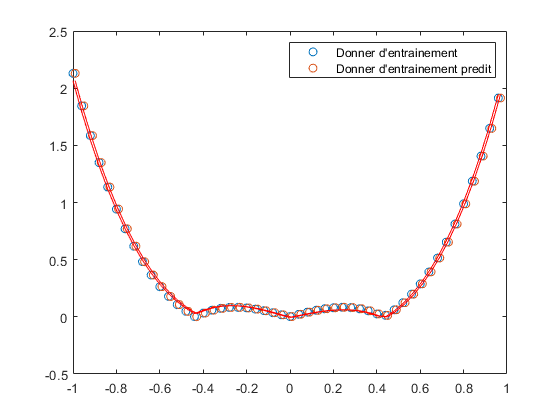

In [105]:
opt_omega = omega;
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'o')
hold on
plot(X_train, y_predit, 'r')
legend({"Donner d'entrainement", "Donner d'entrainement predit"}, 'Location', 'northeast');
hold off


##### Sur les données de test :


err_rela =

    0.0734




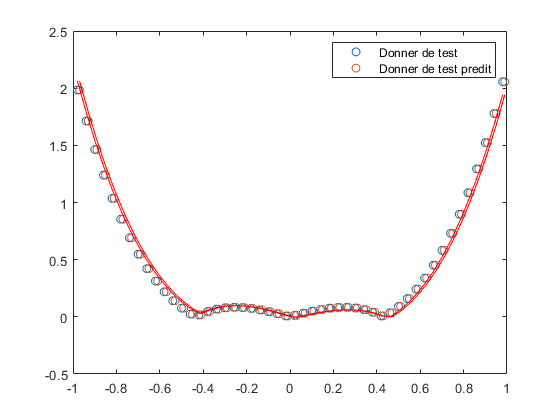

In [106]:
K2 = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K2(i, j) = noyau(X_test(i, :), X_train(j, :), 6);
  end  
end
y_test = modele(4, X_test);
y_test_predit = K * opt_omega;
err_rela = norm(y_test  - y_test_predit) / norm(y_test_predit)
plot(X_test, y_test, 'o')
hold on
plot(X_test, y_test_predit, 'r')
legend({"Donner de test", "Donner de test predit"}, 'Location', 'northeast');

hold off

#### Conclusion

Pour une valeur de $\lambda$ élevée (1.9), l'algorithme a convergé lentement (50000 itérations), et avec une erreur relative assez importante (0.82) par rapport à celle que l'on obtient (0.0734) avec un $\lambda$ plus petit (0.001) en 1752 itérations.

## Conclusion 

On remarque que la régularisation Ridge donne de meilleurs résultats que la régularisation LASSO. En effet, la régularisation LASSO a tendance à annuler les coefficients des variables les moins importantes, ce qui n'est pas le cas de la régularisation Ridge. Ainsi que dans ce cas, la régularisation elastic Net donnes les memes résultats que la régularisation Ridge, avec une erreur relationnelle de 0.0734 pour chacun. De plus, on remarque que plus la valeur de $\lambda$ est grande, plus l'algorithme converge lentement et avec une erreur relative assez importante.